In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Loading the VGG16 features and the mnist dataset

In [2]:
vgg16_train_features = np.loadtxt('vgg16_train_features.out', dtype='float32', delimiter=' ')

In [3]:
vgg16_test_features = np.loadtxt('vgg16_test_features.out', dtype='float32', delimiter=' ')

In [6]:
(_, y_train), (_, y_test) = mnist.load_data()

In [7]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [8]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

Creating the regression model

In [19]:
model = Sequential()

model.add(Dense(512, input_shape=(512,)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=32)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(vgg16_train_features,
                    y_train,
                    epochs=250, 
                    batch_size=32, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

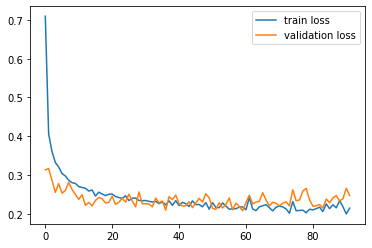

In [20]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

## Test features

In [21]:
test_results = model.evaluate(vgg16_test_features, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2315 - accuracy: 0.9423


In [22]:
predictions = model.predict(vgg16_test_features)

In [23]:
l = []
for y, p in zip(y_test, predictions): 
    l.append(y - p)

(array([9.5000e+01, 3.7000e+01, 5.5000e+01, 4.7000e+01, 4.6000e+01,
        4.6000e+01, 4.9000e+01, 7.7000e+01, 9.2000e+01, 1.3800e+02,
        1.3500e+02, 2.2700e+02, 4.7900e+02, 1.0070e+03, 7.4630e+04,
        2.1124e+04, 3.6200e+02, 1.8500e+02, 1.3100e+02, 1.0600e+02,
        9.8000e+01, 9.3000e+01, 8.3000e+01, 6.7000e+01, 6.8000e+01,
        6.6000e+01, 6.5000e+01, 7.7000e+01, 9.5000e+01, 2.2000e+02]),
 array([-1.        , -0.93333334, -0.8666667 , -0.8       , -0.73333335,
        -0.6666667 , -0.6       , -0.53333336, -0.46666667, -0.4       ,
        -0.33333334, -0.26666668, -0.2       , -0.13333334, -0.06666667,
         0.        ,  0.06666667,  0.13333334,  0.2       ,  0.26666668,
         0.33333334,  0.4       ,  0.46666667,  0.53333336,  0.6       ,
         0.6666667 ,  0.73333335,  0.8       ,  0.8666667 ,  0.93333334,
         1.        ], dtype=float32),
 <BarContainer object of 30 artists>)

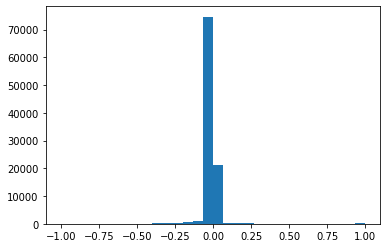

In [24]:
plt.hist(np.array(l).flatten(), bins=30)

## Train features

In [25]:
train = model.evaluate(vgg16_train_features, y_train, verbose=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1778 - accuracy: 0.9502


In [26]:
predictions = model.predict(vgg16_train_features)

In [27]:
l = []
for y, p in zip(y_train, predictions): 
    l.append(y - p)

(array([4.33000e+02, 2.10000e+02, 2.17000e+02, 2.16000e+02, 2.47000e+02,
        2.72000e+02, 3.19000e+02, 4.00000e+02, 5.08000e+02, 6.76000e+02,
        8.77000e+02, 1.38200e+03, 2.55400e+03, 6.19000e+03, 4.48157e+05,
        1.27309e+05, 2.14400e+03, 1.24300e+03, 8.80000e+02, 6.91000e+02,
        5.93000e+02, 4.83000e+02, 4.59000e+02, 4.57000e+02, 4.19000e+02,
        3.99000e+02, 3.73000e+02, 4.17000e+02, 5.06000e+02, 9.69000e+02]),
 array([-1.        , -0.93333334, -0.8666667 , -0.8       , -0.73333335,
        -0.6666667 , -0.6       , -0.53333336, -0.46666667, -0.4       ,
        -0.33333334, -0.26666668, -0.2       , -0.13333334, -0.06666667,
         0.        ,  0.06666667,  0.13333334,  0.2       ,  0.26666668,
         0.33333334,  0.4       ,  0.46666667,  0.53333336,  0.6       ,
         0.6666667 ,  0.73333335,  0.8       ,  0.8666667 ,  0.93333334,
         1.        ], dtype=float32),
 <BarContainer object of 30 artists>)

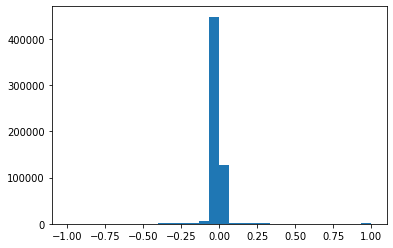

In [28]:
plt.hist(np.array(l).flatten(), bins=30)